<a href="https://www.kaggle.com/code/nguyenductam/pandas-reshaping-data?scriptVersionId=144061037" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="color:DodgerBlue;">  <b>Introduction to Data Reshaping</b>  </h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2 style="color:Tomato;"><b><i>1.Wide and long data formats</i></b></h2>

### You will learn
* Wide and long formats
* Long to wide transformation
* Stacking and unstacking columns
* Reshaping and handling complex data, such as string columns or JSON data

### Why it is important
* Tidy datasets
* Data is not in the appropriate format for analysis:
* Human readable vs. statistical analysis
* Nested data in DataFrames is complex to handle
* Get summary statistics for multi-level index DataFrames

[Wide and long data formats](https://campus.datacamp.com/courses/reshaping-data-with-pandas/introduction-to-data-reshaping?ex=1)

<h3 style="color:MediumSeaGreen;"> Reshaping data</h3>
**Transforming a DataFrame or Series structure to adjust it for analysis** 
1.       *Transposing a DataFrame*

In [ ]:
df = pd.read_csv('/kaggle/input/dataplot1/data1.csv')
name_data1 = df.set_index('Name')
print(name_data1)
print("\n")
name_data2 = name_data1.reset_index()
print(name_data2)
print("\n")
name_data3 = name_data1.reset_index(drop = True)
print(name_data3)

**To transform rows to columns and so on !**

In [ ]:
print(name_data1[["Year", "Weight"]])
print("\n")
print(name_data1[["Year", "Weight"]].transpose())

<h3 style="color:MediumSeaGreen;"> Wide to long transforation</h3>
* Performed using **pandas** functions, such as
    * `.melt()`
    * `.wide_to_long()`

<h3 style="color:MediumSeaGreen;"> Long to wide format</h3>
* Transform data using pandas methods, for example:
    * `.pivot()`
    * `.pivot_table()`

<h4 style="color:Orange;"> Flipping players</h4>

> Congratulations! You got the data scientist job! In your first project, you will work with the `fifa_players` dataset. It contains data of the players included in the last version of the video game. Before you start to do any analysis, you need to clean and format your dataset.
> 
> As a first step, you need to explore your dataset and reshape it using basic steps, such as setting different indices, filtering columns and flipping the DataFrame. You would like to see if that is enough for further analysis.
> 
> The `fifa_players` dataset is available for you. The `pandas` module will be preloaded as pd in your session throughout all the exercises of the course.

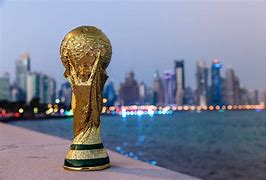

In [ ]:
fifa_players = pd.read_csv("/kaggle/input/dataplot3/data2.csv")

##### Instructions 1/3
* Set the index of `fifa_players` to be the `name` column and assign it to `fifa_transpose`.

In [ ]:
fifa_transpose = fifa_players.set_index("name")
print(fifa_transpose)

##### Instructions 2/3
* Modify the code to select only the columns `height` and `weight` from the `fifa_players` DataFrame.

In [ ]:
# Modify the DataFrame to keep only height and weight columns
fifa_transpose = fifa_players.set_index('name')[["height", "weight"]]

# Print fifa_transpose
print(fifa_transpose)

##### Instructions 3/3
* Finally, transpose the `fifa_players` DataFrame so that the rows become columns and the columns become rows.

In [ ]:
# Change the DataFrame so rows become columns and vice versa
fifa_transpose = fifa_players.set_index('name')[['height', 'weight']].transpose()

# Print fifa_transpose
print(fifa_transpose)